In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

In [2]:
from configs import task_dataframe
import pandas as pd, matplotlib.pyplot as plt, random
from helper import set_seed

/data/yzeng58/anaconda3/envs/micl/lib/python3.8/site-packages/transformers/utils/hub.py:123: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [3]:
def list_img(
    task_type,
    obj,
    detail,
    model,
    shot, 
    metric = None,
    task_inference = None,
):
    set_seed(123)
    eval_folder = f'{root_dir}/results/evals/{model}_image/shot_{shot}'
    img_list = []
    for task_id in task_dataframe:
        if task_inference:
            if task_dataframe[task_id]['task_name'].split('-')[1] != task_inference: continue
        if task_dataframe[task_id]['task_type'] == task_type:
            csv_df = pd.read_csv(f'{eval_folder}/task_{task_id}_summary.csv')

            result_df = csv_df[
                (csv_df['ground_truth_obj'] == obj) & 
                (csv_df['ground_truth_detail'] == detail) 
            ]
            if metric: result_df = result_df[result_df[metric] == 'True']
            
            img_list.append(result_df[['file_path', 'correct']]) 

    # merge different datafrane into one
    img_list = pd.concat(img_list).sort_values(by='correct', ascending=False).reset_index(drop=True)
    return img_list['file_path']

style_object apple pixel
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/data/yzeng58/micl/results/exps/gill_image/shot_2/task_5/208_apple_futuristic_old_pixel.jpg
/data/yzeng58/micl/results/exps/gill_image/shot_2/task_5/597_apple_origami_icon_pixel.jpg
/data/yzeng58/micl/results/exps/gill_image/shot_2/task_5/613_apple_graffiti_old_pixel.jpg


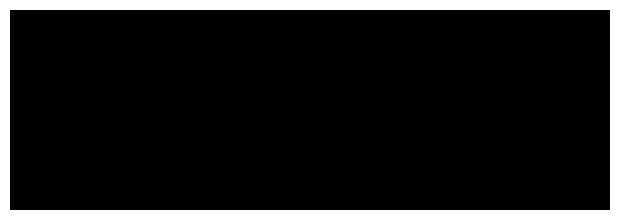

/data/yzeng58/micl/results/exps/emu_image/shot_2/task_5/778_apple_watercolor_origami_pixel.jpg
/data/yzeng58/micl/results/exps/emu_image/shot_2/task_5/208_apple_futuristic_old_pixel.jpg
/data/yzeng58/micl/results/exps/emu_image/shot_2/task_5/597_apple_origami_icon_pixel.jpg


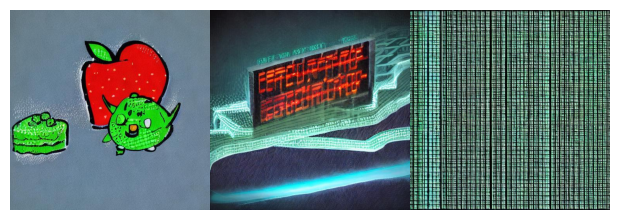

/data/yzeng58/micl/results/exps/seed_image/shot_2/task_5/613_apple_graffiti_old_pixel.jpg
/data/yzeng58/micl/results/exps/seed_image/shot_2/task_5/778_apple_watercolor_origami_pixel.jpg
/data/yzeng58/micl/results/exps/seed_image/shot_2/task_5/790_apple_3d_icon_pixel.jpg


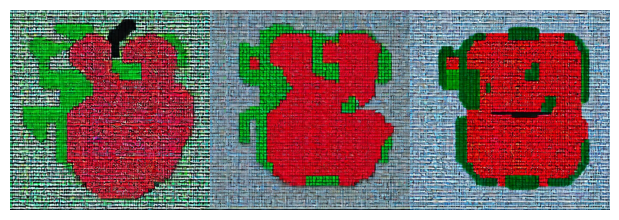

style_object bag graffiti
/data/yzeng58/micl/results/exps/gill_image/shot_2/task_5/135_bag_old_icon_graffiti.jpg
/data/yzeng58/micl/results/exps/gill_image/shot_2/task_5/213_bag_origami_watercolor_graffiti.jpg
/data/yzeng58/micl/results/exps/gill_image/shot_2/task_5/304_bag_origami_3d_graffiti.jpg


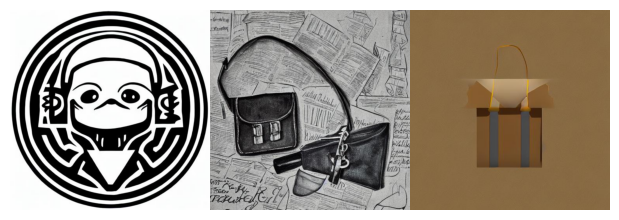

/data/yzeng58/micl/results/exps/emu_image/shot_2/task_5/135_bag_old_icon_graffiti.jpg
/data/yzeng58/micl/results/exps/emu_image/shot_2/task_5/213_bag_origami_watercolor_graffiti.jpg
/data/yzeng58/micl/results/exps/emu_image/shot_2/task_5/304_bag_origami_3d_graffiti.jpg


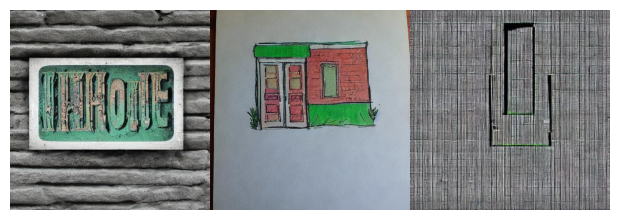

/data/yzeng58/micl/results/exps/seed_image/shot_2/task_5/135_bag_old_icon_graffiti.jpg
/data/yzeng58/micl/results/exps/seed_image/shot_2/task_5/213_bag_origami_watercolor_graffiti.jpg
/data/yzeng58/micl/results/exps/seed_image/shot_2/task_5/304_bag_origami_3d_graffiti.jpg


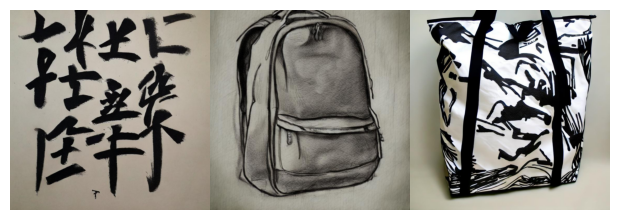

In [13]:
model_list = ['gill', 'emu', 'seed']
vis_combs = [
    # ('color_object', 'bag', 'purple'),
    # ('color_object', 'hat', 'white'),
    # ('color_object', 'car', 'orange'),
    # ('color_object', 'book', 'pink'),
    # ('color_object', 'box', 'green'),
    # ('color_object', 'leaf', 'blue'),

    # ('style_object', 'cup', 'sketch'),
    # ('style_object', 'chair', 'watercolor'),
    # ('style_object', 'book', 'old'),
    ('style_object', 'apple', 'pixel'),
    ('style_object', 'bag', 'graffiti'),

    # ('action_animal', 'dog', 'swim'),
    # ('action_animal', 'zebra', 'drink'),
    # ('action_animal', 'cat', 'eat'),

    # ('texture_object', 'ball', 'metal'),
    # ('texture_object', 'box', 'wood'),
    # ('texture_object', 'hat', 'wicker'),

    # ('background_animal', 'bird', 'waterfall'),
    # ('background_animal', 'lion', 'beach'),
    # ('background_animal', 'tiger', 'glacier'),
]


# Number of rows and columns for the big image
n_rows = 1
n_cols = 3
shot = 2
metric = None
task_inference = 'I'

for task_type, obj, detail in vis_combs:
    print(task_type, obj, detail)
    for model in model_list:
        img_list = list_img(
            task_type = task_type,
            obj = obj,
            detail = detail,
            model = model,
            shot = shot,
            metric = metric,
            task_inference = task_inference,
        )

        # Create a figure with subplots
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace = 0) #margin of the figure

        for i, ax in enumerate(axes.flatten()):
            if i < len(img_list):
                if os.path.exists(img_list[i]):
                    ax.imshow(plt.imread(img_list[i]))
                print(img_list[i])
                ax.axis('off')  # Turn off axis
            else:
                ax.axis('off')  # Ensure no empty subplot has visible axis

        plt.tight_layout(pad=0)
        save_path = f'{root_dir}/figures/{model}_{obj}_{detail}_{shot}_{metric}_{task_inference}.pdf'
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        fig.savefig(save_path)
        
        demos = []
        for img in img_list[(n_rows * n_cols):]:
            
            demos.append([])
        plt.show()


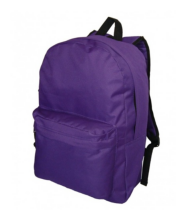

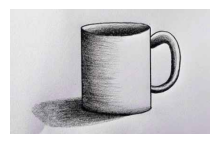

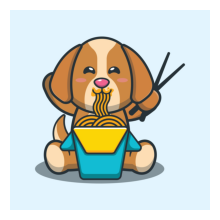

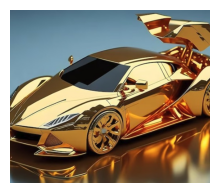

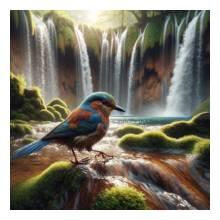

In [10]:
model_list = ['emu', 'gill', 'seed']
vis_combs = [
    ('color_object', 'bag', 'purple'),
    ('style_object', 'cup', 'sketch'),
    ('action_animal', 'dog', 'eat'),
    ('texture_object', 'car', 'metal'),
    ('background_animal', 'bird', 'waterfall'),
]


# Number of rows and columns for the big image
n_rows = 1
n_cols = 1
shot = 2

for task_type, obj, detail in vis_combs:
    detail_space = task_type.split('_')[0]
    img_list = [f'{root_dir}/datasets/{detail_space}_{obj}/{detail}_{obj}.jpg']

    # Create a figure with subplots
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace = 0) #margin of the figure

    ax.imshow(plt.imread(img_list[0]))
    ax.axis('off')  # Turn off axis

    plt.tight_layout(pad=0)
    save_path = f'{root_dir}/figures/dataset_{obj}_{detail}.pdf'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path)
    plt.show()
